Malaria is a mosquito-borne illness caused by the plasmodium parasite. The five species that affect humans are Plasmodium falciparum, Plasmodium malariae, Plasmodium vivax, Plasmodium ovale, and Plasmodium knowlesi. About 90% of all infections and deaths are caused by Plasmodium falciparum in Africa. 85% of all infections and 90% of all deaths from Malaria are in sub-Saharan Africa. While individuals of all ages are susceptible to malaria, the most at risk demographic are children 5 and under. Of the 435,000 malaria deaths accounted for in 2017, 61% of those deaths were children under 5 years. 

The mechanism of malaria spread involves two hosts: humans and the female Anopheles mosquito (only female mosquitos take blood meal). When the infected female Anopheles mosquito takes a blood meal the human host is inoculated with sporozoites. The sporozoites then go onto infect the human liver cells where they mature into schizonts. When the schizonts rupture the liver cells they mature and release merozoites. The merozoites then go onto infect red blood cells, the parasites in the blood are what are responsible for infection. Some parasites differentiate into gametocytes which are taken up by the female mosquito during blood meal. The parasite turns into sporozoites in the mosquito's stomach after development and make their way to the salivary glands of the mosquito. Then the cycle starts over. 

Clinical Symptoms of Malaria are manifested in two different stages depending on the severity or development. The less intense stage is known as uncomplicated malaria and involves symptoms of fever, headache, and nausea. The complicated stage of malaria induces metabolic acidosis, cerebral malaria (seizures and coma), anemia, and edema. Diagnois of malaria can be done through blood films, PCR, Rapid Diagnostic Testing (RDT) and microscopy. The most common treatment for uncomplicated malaria is chemotherapy through oral agents like malarone or mefloquine. Complicated malaria is treated by the injectable agent quinine or artesunate. Malaria vaccines are being developed, and have shown limited success in clinical trials. While malaria control has been very succesful in the past 15 years, concerns are developing over the future of malaria as parasites are showing resistance to drug development. This is why developing models for malaria spread and malaria control are still essential to understanding the flux in malaria infection, which leads me to my project: modeling malaria spread with compartmental models and odient.  

My project focuses on using compartmental models and odeint to model the malaria epidemic.  While in class we originally used the SIRS model to model zombie infection spread, to accomodate for the parameters of my model I have applied a SEIR and SEIRS compartmental system. The SEIR model represents: Susceptible population, Exposed population, Infected population, and Recovered population. I chose to input two systems into the SEIR model as well to show how a closed system works against a realistic system which includes vitality dynamics. The closed system is a simple system that has no added or subtracted components. The vitality dynamics represent births and deaths which has more application to actual population fluctuation. The SEIRS model represents every compartment and rate present in the SEIR model with the additive of recoverd population being able to go back into the susceptible population. The SEIRS model has the most complex features that replicates malaria epidemiology as not everyone infected dies from malaria and malaria infection can happen many times within an individuals life and is complimented wih birth and death dynamics. My goal with this project is to generate random generated variables to make predictions about malaria spread and to input variables that represent malaria infection in sub-Saharan Africa, the region most widely impacted by malaria infection. 

In [225]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from IPython.display import display, clear_output, set_matplotlib_formats

The constant variables in the SEIR and SEIRS model are infectious rate (B), inacuation period (sig), duration of infection (D), and recovery rate (lam). N is a constant that is meant to represent the total and conistent population in the model. 

The equations for each factor will be represented as follows:
S(Susceptibility) = -(infectious rate * susceptibility factor * Infection factor)/N = -(B * Si * Ii)/N

E(Exposed) = ((infectious rate * susceptibility factor * Infection factor)/N) - inacuation peroid * Exposed rate =            ((B * Si* Ii)/N) - sig * Ei

I(infection) = inacuation period * exposed factor - recovery rate * Infection factor

R(Recovered) = recovery rate * Infection factor

The influeunce of compartments is one dimensional and linear in the model, meaning susceptible goes into exposed, exposed into infected, and exposed and infected into recovered. 

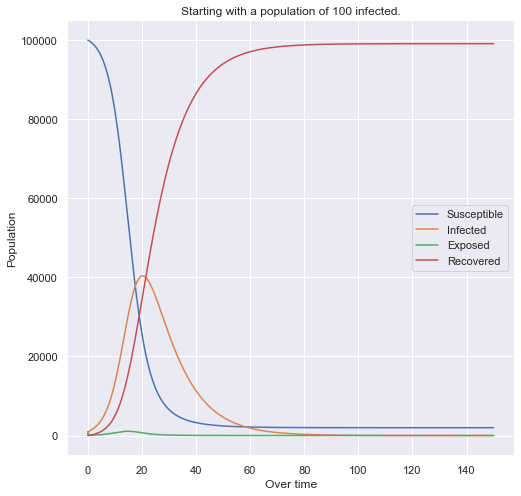

In [253]:
B = .4 #infectious rate (randomly selected)
sig = 6 #inacutation period of p.falciparum (randomly selected)
D = 10 #duration of infection (randomly selected)
lam = 1/D #recovery rate

def SEIR(y,t,B,D,sig,lam):
    Si = y[0]
    Ei = y[1]
    Ii = y[2]
    Ri = y[3]
    N = S0+E0+I0+R0
    
    dSdt = -(B*Si*Ii)/N
    dEdt = ((B*Si*Ii)/N) - sig*Ei
    dIdt = sig*Ei - lam*Ii
    dRdt = lam*Ii
    
    return [dSdt,dEdt,dIdt,dRdt]

S0 = 100000    #randomly selected susptible population 
E0 = 1000       #this inititial model will have 100 exposed
I0 = 100        #initial infected will be 5 for the first model
R0 = B/lam
y0 = [S0,E0,I0,R0]
t = np.linspace(0,150,1000)

soln = odeint(SEIR, y0, t, args=(B,D,sig,lam))
S = soln[:, 0]
E = soln[:, 1]
I = soln[:, 2]
R = soln[:, 3]
plt.figure(figsize=(8,8))

plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t,E, label = 'Exposed')
plt.plot(t,R,label = 'Recovered')
plt.xlabel('Over time')
plt.ylabel('Population')
plt.title('Starting with a population of 100 infected.')
plt.legend(loc=0)


For the initial SEIR I used random numbers and rates to represent everything in order to initiate an odient and graph it to represent my model of the malaria epidemic using random variables. The graph shows susceptible decreasing and being over taken by recovered as time goes on, while disease spikes and the population then enters infected. Exposed feeds infected and recovered while staying low. The system is closed without deaths or births which is seen as all compartments remain consistent to a non-fluctuating population. 

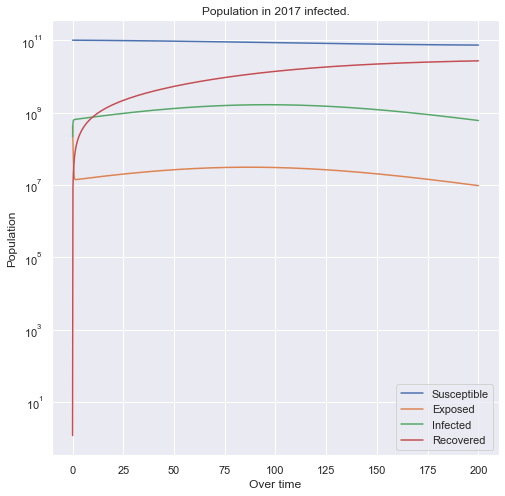

In [235]:
B = .13 #infectious rate
sig = 6 #inacutation period of p.falciparum
D = 9 #duration of infection
lam = 1/D #recovery rate

def SEIR(y,t,B,D,sig,lam):
    Si = y[0]
    Ei = y[1]
    Ii = y[2]
    Ri = y[3]
    N = S0 + E0 + I0 + R0
    
    dSdt = -(B*Si*Ii)/N
    dEdt = ((B*Si*Ii)/N) - sig*Ei
    dIdt = sig*Ei - lam*Ii
    dRdt = lam*Ii
    
    return [dSdt,dEdt,dIdt,dRdt]

S0 = 1.01 * 10**11 #population of sub-saharan Africa
E0 = 4.34 * 10**8  #population exposed in sub-Saharan Africa in 2017  
I0 = 2.17 * 10**8  #populatin infected in sub-Saharan Africa in 2017
R0 = B/lam
y0 = [S0,E0,I0,R0]
t = np.linspace(0,200,1000)

soln = odeint(SEIR, y0, t, args=(B,D,sig,lam))
S = soln[:, 0]
E = soln[:, 1]
I = soln[:, 2]
R = soln[:, 3]
plt.figure(figsize=(8,8))

plt.semilogy(t,S, label='Susceptible')
plt.semilogy(t, E, label='Exposed')
plt.semilogy(t,I, label = 'Infected')
plt.semilogy(t,R,label = 'Recovered')
plt.xlabel('Over time')
plt.ylabel('Population')
plt.title('Population in 2017 infected.')
plt.legend(loc=0)


For the second non-vital SEIR model I ran variables that correspond to the population of sub-Saharan Africa with help from variables of the World Health Organization that I then used to calculate exposed and infected individuals given the total population of sub-Saharan Africa. While inacuation and duration range can differ, I calculated the mean of each and chose the numbers to represent each category respectively. I applied semilog to the plots in order to better represent such a high population better and to show the comparmental flow of the variables. 

The next incorporation into the SEIR model is birth rate(u) and death rate(v) in order to accomadate the demands of population fluctuation present in real life. 

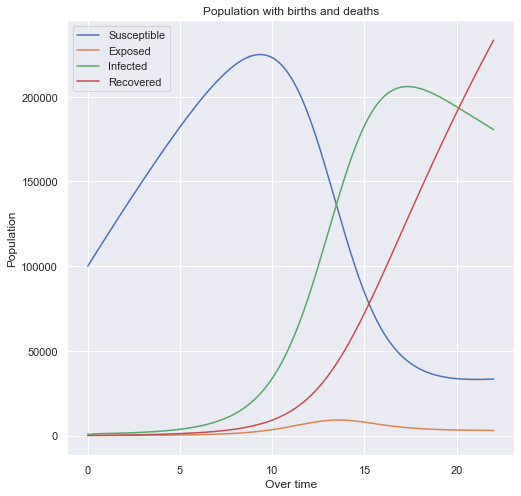

In [233]:
B = .3 #infectious rate
sig = 6 #incutation period 
D = 8 #duration of infection
lam = 1/D #recovery rate
u = 0.185 #birth rate
v = 0.01 #death rate
def SEIR(y,t,B,D,sig,lam,u,v):
    Si = y[0]
    Ei = y[1]
    Ii = y[2]
    Ri = y[3]
    N = S0 +E0 +I0 + R0
    
    dSdt = u*N - v*Si -((B*Si*Ii)/N) #code is being changed to incorporate births and deaths
    dEdt = ((B*Si*Ii)/N) - v*Ei- sig*Ei 
    dIdt = sig*Ei - lam*Ii - v*Ii
    dRdt = lam*Ii - v*Ri
    
    return [dSdt,dEdt,dIdt,dRdt]

S0 = 100000 #random number
E0 =  1000  #random number
I0 = 75     #random number
R0 = 0
y0 = [S0,E0,I0,R0]
t = np.linspace(0,22,1000)

soln = odeint(SEIR, y0, t, args=(B,D,sig,lam,u,v))
S = soln[:, 0]
E = soln[:, 1]
I = soln[:, 2]
R = soln[:, 3]
plt.figure(figsize=(8,8))

plt.plot(t,S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t,I, label = 'Infected')
plt.plot(t,R,label = 'Recovered')
plt.xlabel('Over time')
plt.ylabel('Population')
plt.title('Population with births and deaths')
plt.legend(loc=0)

The SEIR model with births and deaths can be useful when applied to an open system. The death rate was calculated from yearly deaths from malaria divided by the susceptible population. While the birth rate was randomly assigned. The model examplifies the population fluctuation by increasing initially in susceptibility which increases above the initial population and then begins to dip over time and then feeds into the recovered population which begins to extend above the initial population as well. This identifies the addition of births and deaths, and since births are significantly higher than deaths, the overall population in the model increases. The infection rate was set to a high rate of 0.3 which influenced both exposure and infection, not only leading to a high infection population, but leading to a high population recovered. The model has potential to be manipulated easily through the variables present. If somebody knew the exact values of the parameters they wished to input, any region could be modeled by this compartmental model. The difficulty of the birth rate is that it can drastically change from region to region, while there is a universal birth rate, when it comes to a disease like Malaria which heavily impacts one region of the world more than others, the universal birth rate isn't as effective in explaining the epidemic. Where as regional birth rates can have a better indicator to human behavior. 

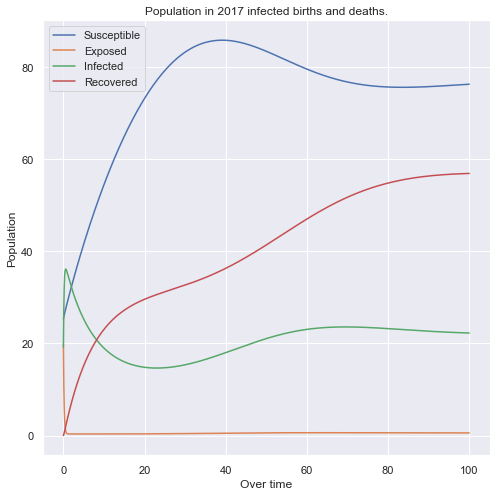

In [232]:
B = .13 #infectious rate
sig = 6 #incutation period of p.falciparum
D = 9 #duration of infection
lam = 1/D #recovery rate
u = 0.105 #birth rate
v = 0.043 #death rate
def SEIR(y,t,B,D,sig,lam,u,v):
    Si = y[0]
    Ei = y[1]
    Ii = y[2]
    Ri = y[3]
    N = S0 + E0 + I0 + R0
    
    dSdt = u*N - v*Si -((B*Si*Ii)/N) 
    dEdt = ((B*Si*Ii)/N) - v*Ei- sig*Ei
    dIdt = sig*Ei - lam*Ii - v*Ii
    dRdt = lam*Ii - v*Ri
    
    return [dSdt,dEdt,dIdt,dRdt]

S0 = np.log(1.01 *10**11) #population of sub-Saharan Africa
E0 =  np.log(4.34 * 10**8) #exposed in sub-Saharan Africa 
I0 = np.log(2.17 * 10**8) #infected in sub-Saharan African
R0 = 0
y0 = [S0,E0,I0,R0]
t = np.linspace(0,100,1000)

soln = odeint(SEIR, y0, t, args=(B,D,sig,lam,u,v))
S = soln[:, 0]
E = soln[:, 1]
I = soln[:, 2]
R = soln[:, 3]
plt.figure(figsize=(8,8))

plt.plot(t,S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t,I, label = 'Infected')
plt.plot(t,R,label = 'Recovered')
plt.xlabel('Over time')
plt.ylabel('Population')
plt.title('Population in 2017 infected births and deaths.')
plt.legend(loc=0) 


I again ran the model replicating sub-Saharan parameters and utilized np.log to fit the large numbers better. The graph shows the suscepitble population staying high, with the recovered increasing. The infected population begins to decrease as deaths occur and the rate feeds into the population of recovered. The model obviously shows a different trend then that with the random variables. The biggest influential factor on the sub-Saharan model is that the susceptible is very high while exposed and infected drops by a few hundred million which is significant to keeping the susceptible population high especially when the SEIR system isn't closed and involves births and deaths.

The last model I ran is the SEIRS model which incorporates everything that the SEIR model did with the extra step of a rate from recoverd being added back to susceptible. Malaria is a disease which an individual can have more than once. In fact many individuals who have been infected will experience episodes of malaria more than once in their lives. However, some individuals do develop partial immunity, where they can still be infected by the parasite but will not experience any symptoms. This takes them out of the potential of being susceptible again, as they are not susceptible to disease. The SEIRS model takes into account recovered impacting suscepitbility by adding the factor epsilon which is either added to the Susceptibility population or subtracted from the Recovered population, as in the SEIRS model only recovered can --> susceptibility. 

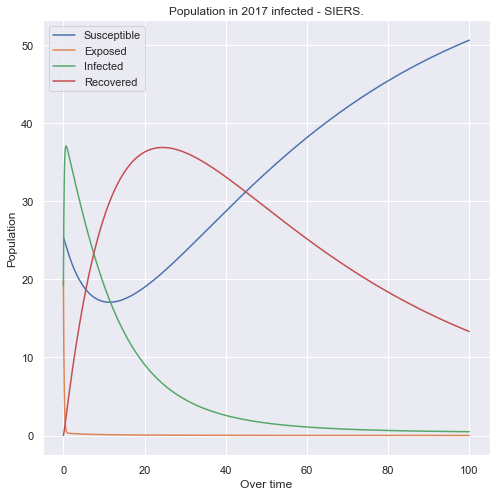

In [257]:
B = .13 #infectious rate
sig = 6 #incutation period of p.falciparum
D = 9 #duration of infection
lam = 1/D #recovery rate
eps = .02 #rate of how many from revovered go back to susceptible 


def SEIR(y,t,B,D,sig,lam,eps):
    Si = y[0]
    Ei = y[1]
    Ii = y[2]
    Ri = y[3]
    N = S0 + E0 + I0 + R0
    
    dSdt = -((B*Si*Ii)/N) + eps*Ri
    dEdt = ((B*Si*Ii)/N) - sig*Ei
    dIdt = sig*Ei - lam*Ii
    dRdt = lam*Ii - eps*Ri
    
    return [dSdt,dEdt,dIdt,dRdt]

S0 = np.log(1.01 * 10**11) #population of sub-saharan Africa
E0 = np.log(4.34 * 10**8)     
I0 = np.log(2.17 * 10**8)
R0 = 0
y0 = [S0,E0,I0,R0]
t = np.linspace(0,100,1000)

soln = odeint(SEIR, y0, t, args=(B,D,sig,lam,eps))
S = soln[:, 0]
E = soln[:, 1]
I = soln[:, 2]
R = soln[:, 3]
plt.figure(figsize=(8,8))

plt.plot(t,S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t,I, label = 'Infected')
plt.plot(t,R,label = 'Recovered')
plt.xlabel('Over time')
plt.ylabel('Population')
plt.title('Population in 2017 infected - SIERS.')
plt.legend(loc=0)


SEIRS with birth and death rates. 

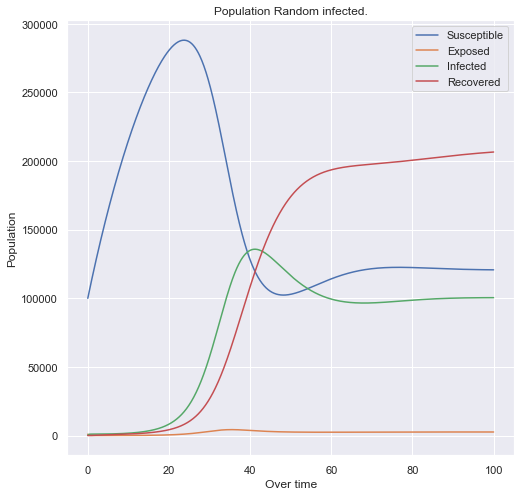

In [237]:
B = .13 #infectious rate
sig = 6 #incutation period of p.falciparum
D = 9 #duration of infection
lam = 1/D #recovery rate
u = 0.185 #birth rate
v = 0.043 #death rate
eps = 0.01
def SEIR(y,t,B,D,sig,lam,u,v,eps):
    Si = y[0]
    Ei = y[1]
    Ii = y[2]
    Ri = y[3]
    N = S0 + E0 + I0 + R0
    
    dSdt = u*N -((B*Si*Ii)/N) + eps*Ri - v*Si  #code is being changed to incorporate births and deaths
    dEdt = ((B*Si*Ii)/N) - v*Ei- sig*Ei
    dIdt = sig*Ei - lam*Ii - v*Ii
    dRdt = lam*Ii - eps*Ri - v*Ri
    
    return [dSdt,dEdt,dIdt,dRdt]

S0 = 100000 
E0 =  1000   
I0 = 75
R0 = B/lam
y0 = [S0,E0,I0,R0]
t = np.linspace(0,100,1000)

soln = odeint(SEIR, y0, t, args=(B,D,sig,lam,u,v,eps))
S = soln[:, 0]
E = soln[:, 1]
I = soln[:, 2]
R = soln[:, 3]
plt.figure(figsize=(8,8))

plt.plot(t,S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t,I, label = 'Infected')
plt.plot(t,R,label = 'Recovered')
plt.xlabel('Over time')
plt.ylabel('Population')
plt.title('Population Random infected.')
plt.legend(loc=0)

The SEIRS model with dynamics shows a spike in susceptibility and then an increase in infected leading to the population having recovered. The model was difficult to actualize using the sub-Saharan statistics so I input random variables to make more sense of the model. As expected the rate of births is higher than the rate of deaths which lead to a population increase which in turn lead to the rate of infected reaching almost 150,000 with an infection rate of .13 and then levels out at around 100,000. The rate of recovered increases as susceptible decreases and infected spikes before leveling out. The low rate from recovered to susceptible results in the recovered population remaining high over time. 

Part 2: Short and simple analysis of Malaria data

In [83]:
import pandas as pd
import seaborn as sns

In [50]:
MMal = pd.read_csv('data_malaria_Malawi.csv')

The data set 'data_malaria_Malawi' was taken from the World Health organization and selected for data showing malaria deaths from 2000-2017 from children under 5 in Malawi. I spent the summer in Malawi doing research on Malaria diagnostics and witnessed the affects of Malaria first hand. The majority of deaths were from children, the biggest reason for the deaths was complex malaria leading to cerebral malaria. Cerebral malaria lead to coma and eventually death.  The simple analysis of the data set using pandas which can be useful to organizing data. While this data set is small and focuses only on Malawi, I still wanted to show the simplicities that python inlcuded in order to view data. And for a researcher being able to trace the reported deaths in children under 5 in a 17 year span can give them a better idea of the progress being made. Of course this is an oversimplification as there are factors that are associated with reasons why some years might have more deaths than others, but having the ability to view and manipulate data sets can improve visuals and organization of the data. 

In [52]:
MMal.head()

,Unnamed: 0,Malaria - number of reported deaths,Malaria - number of reported deaths.1,Malaria - number of reported deaths.2,Malaria - number of reported deaths.3,Malaria - number of reported deaths.4,Malaria - number of reported deaths.5,Malaria - number of reported deaths.6,Malaria - number of reported deaths.7,Malaria - number of reported deaths.8,Malaria - number of reported deaths.9,Malaria - number of reported deaths.10,Malaria - number of reported deaths.11,Malaria - number of reported deaths.12,Malaria - number of reported deaths.13,Malaria - number of reported deaths.14,Malaria - number of reported deaths.15,Malaria - number of reported deaths.16,Malaria - number of reported deaths.17
0,Country,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000.0
1,Malawi,3613,4000,3799,4490,3723,5516,6674,8206,8915,8048,7486,6464,5070,3457,4767,5775,3355,NaN


Using .head() allows the user to view the first 5 rows of data and just to get a general view of data. The data only has two rows but using head puts the data into display which gives me the view on the data. Using .head() I see that the view of 17 years isn't as appealing as it could be. Pandas has a function 'transpose' which writes the columns as rows and the rows as columns. 

In [72]:
MMT = MMal.transpose()

In [82]:
MMT

,0,1
Unnamed: 0,Country,Malawi
Malaria - number of reported deaths,2017,3613
Malaria - number of reported deaths.1,2016,4000
Malaria - number of reported deaths.2,2015,3799
Malaria - number of reported deaths.3,2014,4490
Malaria - number of reported deaths.4,2013,3723
Malaria - number of reported deaths.5,2012,5516
Malaria - number of reported deaths.6,2011,6674
Malaria - number of reported deaths.7,2010,8206
Malaria - number of reported deaths.8,2009,8915


Converting the rows to columns and vice versa imporoves the visual quality of the data and makes it easier to read through. The year goes from descending order and is fairly understandable. In reality the downloaded data set didn't do a great job with labeling the data, however as this is not my data source I cannot complain. The main point is the ability of pandas to transform data shape. 

The next data set gives the presence of Malaria incidence per 1000 individual in Africa, Americas, South-East Asia, Europe, Eastern Mediterranean, and Western Pacific regions for 9 given years starting at 2000 and ending in 2017

In [125]:
SDGM = pd.read_csv('SDGMALARIA.csv')

In [126]:
SDGM.head()

,Unnamed: 0,Malaria incidence (per 1 000 population at risk),Malaria incidence (per 1 000 population at risk).1,Malaria incidence (per 1 000 population at risk).2,Malaria incidence (per 1 000 population at risk).3,Malaria incidence (per 1 000 population at risk).4,Malaria incidence (per 1 000 population at risk).5,Malaria incidence (per 1 000 population at risk).6,Malaria incidence (per 1 000 population at risk).7,Malaria incidence (per 1 000 population at risk).8,Malaria incidence (per 1 000 population at risk).9
0,WHO region,2017.00,2016.00,2015.00,2014.00,2013.00,2012.00,2011.00,2010.00,2005.00,2000.00
1,Africa,219.38,219.92,224.20,233.43,245.42,253.35,260.38,275.13,323.47,327.69
2,Americas,7.31,5.40,4.40,3.74,4.44,4.63,4.93,6.65,11.15,14.58
3,South-East Asia,7.05,8.98,8.92,8.72,9.17,12.37,14.42,17.32,20.92,20.56
4,Europe,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.06,1.99,13.84


Again I used .head() from pandas to get and idea of the data. Pandas also has an opposite of this .tail() which shows the last five columns of the data. As you can see from the data, while the trend generally goes down, you can see that Africa has the highest rate of insidence per at risk population from the data set. 

In [177]:
SDGM.tail()

,Unnamed: 0,Malaria incidence (per 1 000 population at risk),Malaria incidence (per 1 000 population at risk).1,Malaria incidence (per 1 000 population at risk).2,Malaria incidence (per 1 000 population at risk).3,Malaria incidence (per 1 000 population at risk).4,Malaria incidence (per 1 000 population at risk).5,Malaria incidence (per 1 000 population at risk).6,Malaria incidence (per 1 000 population at risk).7,Malaria incidence (per 1 000 population at risk).8,Malaria incidence (per 1 000 population at risk).9
3,South-East Asia,7.05,8.98,8.92,8.72,9.17,12.37,14.42,17.32,20.92,20.56
4,Europe,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.06,1.99,13.84
5,Eastern Mediterranean,14.77,15.14,14.88,15.83,13.60,14.89,16.44,16.23,21.23,28.19
6,Western Pacific,2.47,2.32,1.95,3.19,2.77,2.59,2.19,2.56,3.45,4.80
7,(WHO) Global,59.12,59.29,59.45,61.20,63.27,65.88,67.72,71.73,80.73,78.87


.tail() as stated allows you to view the last five rows of your data set. This is useful to see how many rows in total your data set has. If you want to reach the the tail end of the data you can also utilize .tail() for this reason. .tail() shows me that there are 7 rows in the initial data set. I can also see that the last row is made by WHO by taking the average of all malaria risk incidence globally for each year and putting it into their own category. I can also look and see that Europe has the lowest incidence rate of tail end data, and Eastern Mediterranean has the highest. 

Pandas also comes with the ability to load in your data set and essentially drop or leave out a row or rows depending on the number you want to skip. Since I know I am looking at malaria incidence I can chose to skip that row when loading in the data and have the Countries under 'WHO region' and the incident of malaria per 1000 be under under the year. This is helpful to cleaning up the data when looking at it, instead of going to 'Malaria incidence' you can look at the year the incidence occured instead. 

In [242]:
sd = pd.read_csv('SDGMALARIA.csv',skiprows = 1)

In [243]:
sd.head()

,WHO region,2017,2016,2015,2014,2013,2012,2011,2010,2005,2000
0,Africa,219.38,219.92,224.20,233.43,245.42,253.35,260.38,275.13,323.47,327.69
1,Americas,7.31,5.40,4.40,3.74,4.44,4.63,4.93,6.65,11.15,14.58
2,South-East Asia,7.05,8.98,8.92,8.72,9.17,12.37,14.42,17.32,20.92,20.56
3,Europe,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.06,1.99,13.84
4,Eastern Mediterranean,14.77,15.14,14.88,15.83,13.60,14.89,16.44,16.23,21.23,28.19


While subjective, I think the data looks cleaner after having year being represented for incidence. I can look at the year and corresponding country and know that in 2017 the incidence per 1000 people in Africa was 219.38. 

I can also call into a specific column using iloc

In [244]:
sd.iloc[0:,4] 

0    233.43
1      3.74
2      8.72
3      0.00
4     15.83
5      3.19
6     61.20
Name:  2014, dtype: float64

This calls up the data for the year 2014, which is good for access to the coulumn you want to look. The iloc functions also prints out the name and data type which helps with simple identification factors of the data. The iloc function can also be involved in masking, if I want to see which data are greater than 20 I can give the command:

In [241]:
sd.iloc[0:,4]>20

0     True
1    False
2    False
3    False
4    False
5    False
6     True
Name:  2014, dtype: bool

The command of setting column 4 > 20 prints out the data in boolean. Any value of the 2014 column that does not correspond to being greater than 20 will be stated False, while greater than 20 will be stated True. While boolean language may have little implication to data analysis in it's raw state, it can help uncover specific aspects you wish to find in the data. 

In [251]:
sd[sd.iloc[:,1]>20]

,WHO region,2017,2016,2015,2014,2013,2012,2011,2010,2005,2000
0,Africa,219.38,219.92,224.20,233.43,245.42,253.35,260.38,275.13,323.47,327.69
6,(WHO) Global,59.12,59.29,59.45,61.20,63.27,65.88,67.72,71.73,80.73,78.87


Like using the code above I can acess any value in the data set greater than 20. As a scientist this has great value to selecting for outliers or trends  I want to look at. In this case it is helpful to see that the incidence rate in Africa is very high through all years and even as recent as 2017 and could be contributing to bringing up the value in WHO Global incedent rate. 

Conclusion and Discussion:

While working on the project I ran into a couple of troublesome situations. The first thing I struggled with was making the 'Exposed' compartment have accurate characterisitics in the model. In the model exposed feeds into infection directly and then eventually into recovered. And as you can see in the graphs, exposed should be higher than infected, but instead you see a pretty stagnant exposed compartment. I had difficulty to fix the compartment without making less sense of it. The model would be better if the exposed equation was tweaked with, I think maybe potentially adding another rate of flow from only susceptible to exposed and then exposed to infected would have helped. However, malarial infection rate can be high depending on the region, so exposed feeding the infected population at such a high rate is possible, but to an extent. So that fine point between over and under expression of the 'Exposed' population and its rate is an important feature to improve. 
    Some features that could have been added to add to the model are mosquito nets, insecticide control, and vaccine usage. Mosquito nets reduce the chances of exposed and in turn infected. This would have been an interesting variable to add, but it's difficult to know how effective mosquito nets are in stopping the spread of infection. Another factor to introduce into the model is the use of insectisides. The use of effective insectisides could remove some from being suseceptible and exposed. If an area is sprayed well and the mosquito population decreases significantly and is kept undercontrol, then the amount exposed could definitely be decreased. The last factor I would like to have seen included is vaccine impact. This is something that could be applied to theoretical models and eventually to realistic models as only a trial run of the malaria vaccine has been utilized. Adding a vaccinated variable would be fascinating in predicting how it affects susceptible populations with varying rates of added immunity. 
        My project focused mainly on compartmentalizing malaria epidemic with simulations in odient. I applied a modified SIR model to become SEIR and ran arbitrary numbers I selected and also numbers that replicate statistics in sub-Saharan Africa. The results differ depending on the model and I included an explanation/analysis between each model. My goal was to see how rates influence the population of each compartment overtime to model true malarial infection. And while the model is a simple structure that works well, there could be many additions to essentially 'beef' up the model. I think I was definetely succesful in creating a model that had dynamic flow and wasn't stagnant or completely unrealistic. My mathmetical skills are rather dusty at this point and definetley effected the outcome of the results and complexity of the model, but I put in a lot of effort to put concept to math to graphed results so I'm proud of myself for that. Especially with this being my first time coding. I also added a small part 2 to show the abilities of python to analyse and transform data. As a scientist it is important to look at data from a clean and concise data set, which python gives you the ability to do. 
        Modeling data to find impact on compartments was challenging and had varied outcomes. Results varied depending on the model and variables input into the equations and odient. 

References:

Malaria. (n.d.). Retrieved from http://idmod.org/research/malaria.

This year's World malaria report at a glance. (2019, January 8). Retrieved from https://www.who.int/malaria/media/world-malaria-report-2018/en/.

Country profiles. (2019, July 26). Retrieved from https://www.who.int/malaria/publications/country-profiles/en/.

CDC - Parasites - Malaria. (2019, November 20). Retrieved from https://www.cdc.gov/parasites/malaria/index.html.

Mandal, S., Sarkar, R.R. & Sinha, S. Mathematical models of malaria - a review. Malar J 10, 202 (2011) doi:10.1186/1475-2875-10-202